In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

%matplotlib inline
sbn.set_style("darkgrid")
colors6 = sbn.color_palette(['pink', 'orange', 'green', 'yellow', 'black', '#c9bbaa'], 6)
colors2 = sbn.color_palette(['pink', 'black'], 2)
colors1 = sbn.color_palette(['green'], 1)

In [15]:
def show_relation(col, according_to, type_='dis'):
    plt.figure(figsize=(15,7));
    if type_=='dis':
        sbn.displot(data=DF, x=col, hue=according_to, kind='kde', palette=colors2);
        
    elif type_=='count':
        if according_to != None:
            perc = DF.groupby(col)[according_to].value_counts(normalize=True).reset_index(name='Percentage')
            sbn.barplot(data=perc, x=col,y='Percentage', hue=according_to, palette=colors6, order=DF[col].value_counts().index);
        else:
            sbn.countplot(data=DF, x=col, hue=according_to, palette=colors1, order=DF[col].value_counts().index);

        if according_to==None:
            plt.title(f'{col}');
        else: 
            plt.title(f'{col} According to {according_to}');

# Data Reading

In [10]:
DF = pd.read_csv('../../../datasets/heart_2020_cleaned.csv').reset_index().rename(columns={'index':'id'})
X = DF[DF.columns.difference(['id','HeartDisease'])]
Y = DF['HeartDisease']
X.shape

(319795, 17)

In [11]:
CatCols = [
    'Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','AgeCategory','Race','Diabetic',
    'PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer'
]
NumCols = [
    'BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'
]
X.head()

,AgeCategory,AlcoholDrinking,Asthma,BMI,Diabetic,DiffWalking,GenHealth,KidneyDisease,MentalHealth,PhysicalActivity,PhysicalHealth,Race,Sex,SkinCancer,SleepTime,Smoking,Stroke
0,55-59,No,Yes,16.60,Yes,No,Very good,No,30.0,Yes,3.0,White,Female,Yes,5.0,Yes,No
1,80 or older,No,No,20.34,No,No,Very good,No,0.0,Yes,0.0,White,Female,No,7.0,No,Yes
2,65-69,No,Yes,26.58,Yes,No,Fair,No,30.0,Yes,20.0,White,Male,No,8.0,Yes,No
3,75-79,No,No,24.21,No,No,Good,No,0.0,No,0.0,White,Female,Yes,6.0,No,No
4,40-44,No,No,23.71,No,Yes,Very good,No,0.0,Yes,28.0,White,Female,No,8.0,No,No


# Numerical Description

In [231]:
X.describe()

,BMI,MentalHealth,PhysicalHealth,SleepTime
count,319795.000000,319795.000000,319795.00000,319795.000000
mean,28.325399,3.898366,3.37171,7.097075
std,6.356100,7.955235,7.95085,1.436007
min,12.020000,0.000000,0.00000,1.000000
25%,24.030000,0.000000,0.00000,6.000000
50%,27.340000,0.000000,0.00000,7.000000
75%,31.420000,3.000000,2.00000,8.000000
max,94.850000,30.000000,30.00000,24.000000


# Categorical Description

In [232]:
X.describe(include="object")


,AgeCategory,AlcoholDrinking,Asthma,Diabetic,DiffWalking,GenHealth,KidneyDisease,PhysicalActivity,Race,Sex,SkinCancer,Smoking,Stroke
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,13,2,2,4,2,5,2,2,6,2,2,2,2
top,65-69,No,No,No,No,Very good,No,Yes,White,Female,No,No,No
freq,34151,298018,276923,269653,275385,113858,308016,247957,245212,167805,289976,187887,307726


# Research Questions

### What are the percentage of heart disease patients?

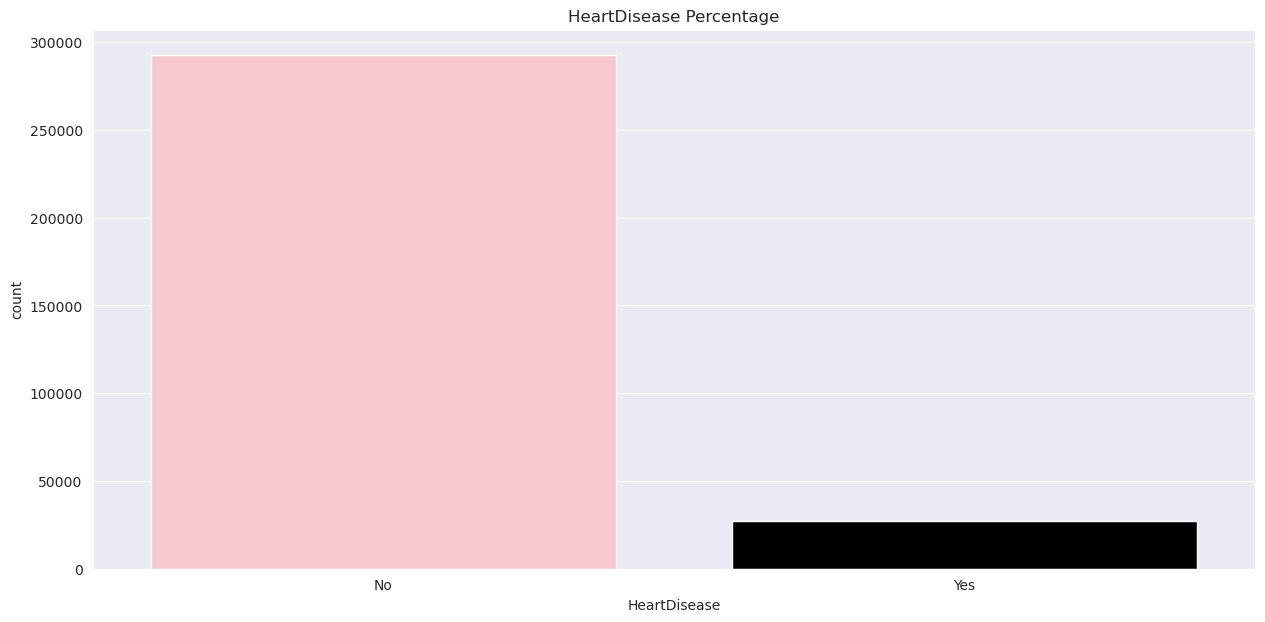

In [12]:
plt.figure(figsize=(15,7));
plt.title('HeartDisease Percentage');
sbn.countplot(data=DF, x='HeartDisease', palette=colors2, order=DF['HeartDisease'].value_counts().index);

### Relation between Sex and Heart Disease

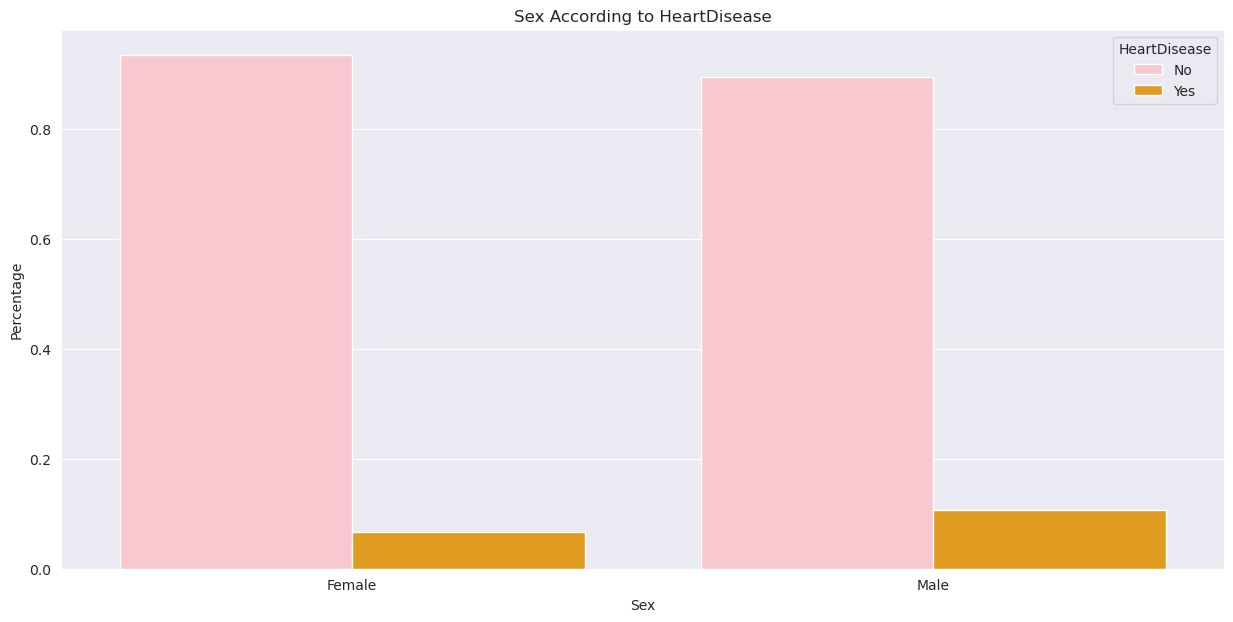

In [16]:
show_relation(CatCols[4], 'HeartDisease', type_='count')

### Relation between Age and Heart Disease

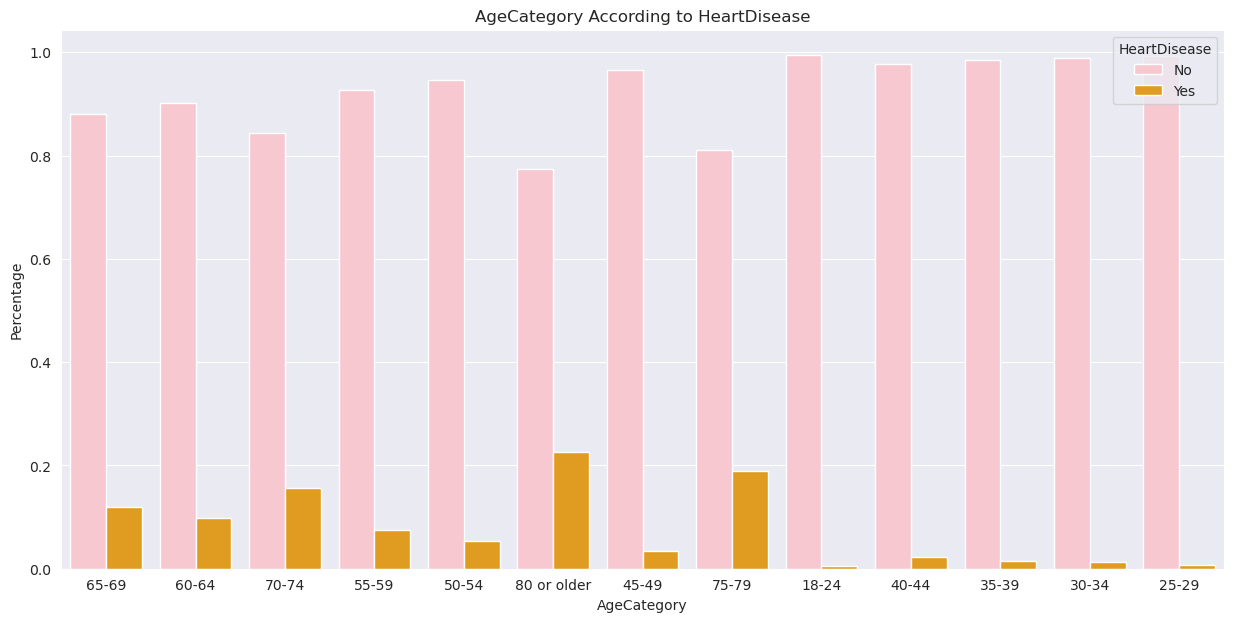

In [17]:
show_relation(CatCols[5], 'HeartDisease', type_='count')

### Relation between Race and Heart Disease

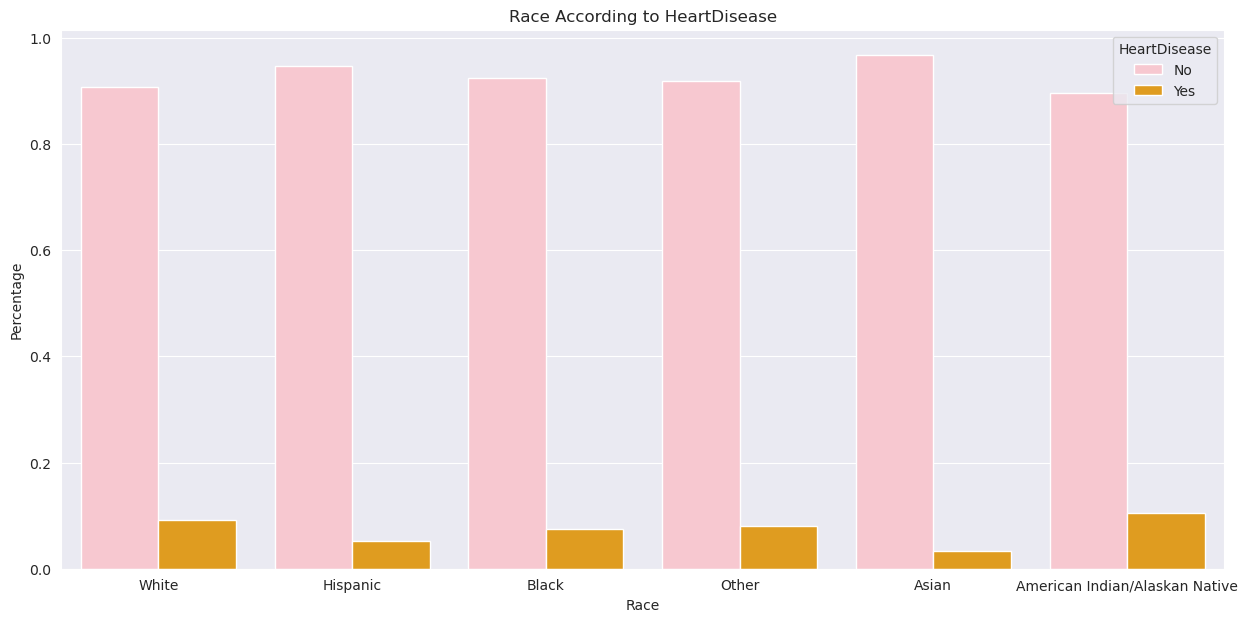

In [18]:
show_relation(CatCols[6], 'HeartDisease', type_='count')

### Relation between BMI and Heart Disease

<Figure size 1500x700 with 0 Axes>

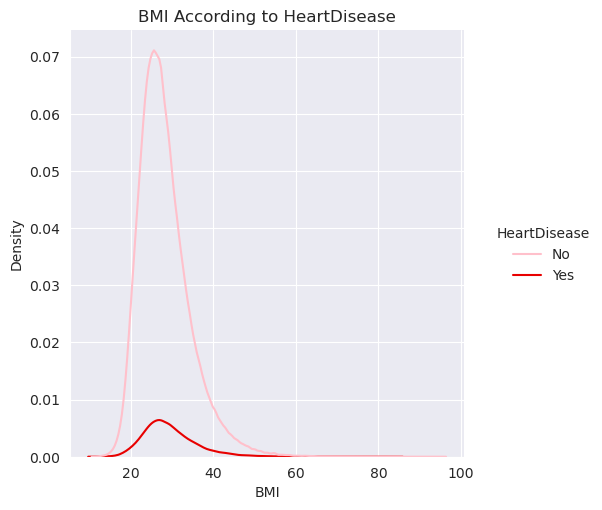

In [13]:
show_relation(NumCols[0], 'HeartDisease')

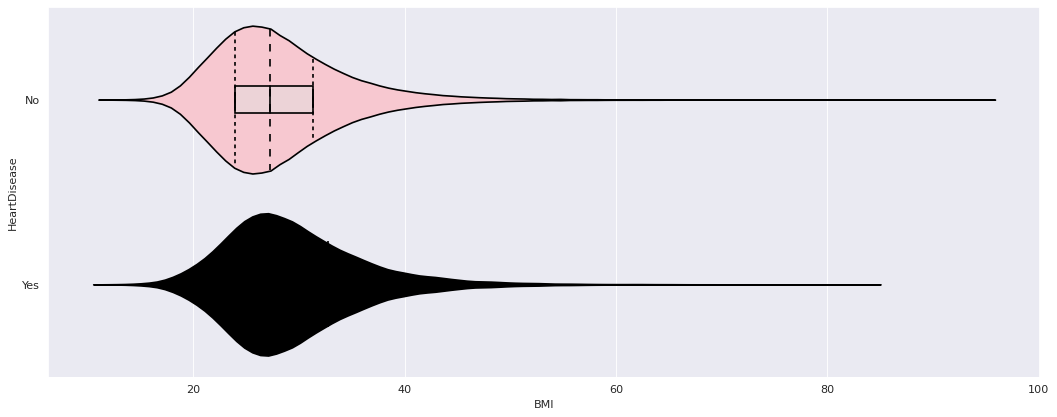

In [19]:
plt.figure(figsize=(16, 6), dpi=80)

sbn.boxplot(data=DF, x='BMI', y='HeartDisease', saturation=0.4, 
            width=0.15, boxprops={'zorder': 2},
            showfliers = False, whis=0,  palette=colors2);
sbn.violinplot(data=DF, x='BMI', y='HeartDisease',inner='quartile', palette=colors2);

### Relation between Sleep and Heart Disease

<Figure size 1500x700 with 0 Axes>

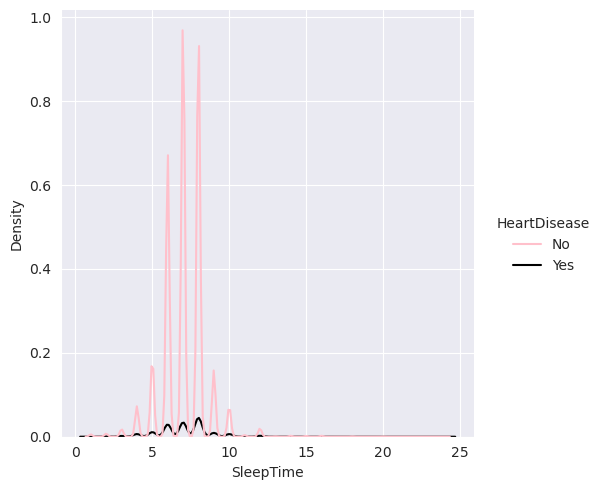

In [20]:
show_relation(NumCols[3], 'HeartDisease')

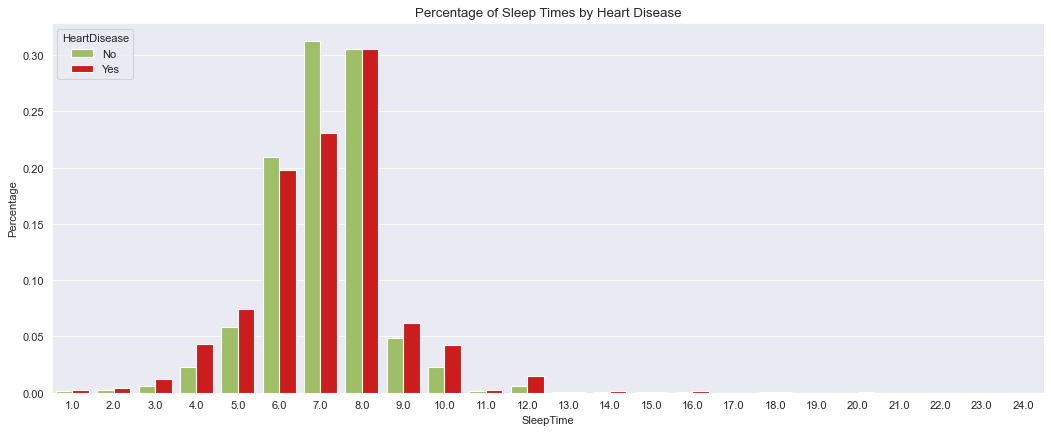

In [240]:
relative = DF.groupby('HeartDisease').SleepTime.value_counts(normalize=True).reset_index(name='Percentage')
plt.figure(figsize=(16, 6), dpi=80)
ax = sbn.barplot(data=relative, x='SleepTime', y='Percentage', hue='HeartDisease', palette=colors2);
ax.set_title("Percentage of Sleep Times by Heart Disease");

### Relation between Alcohol Drinking 

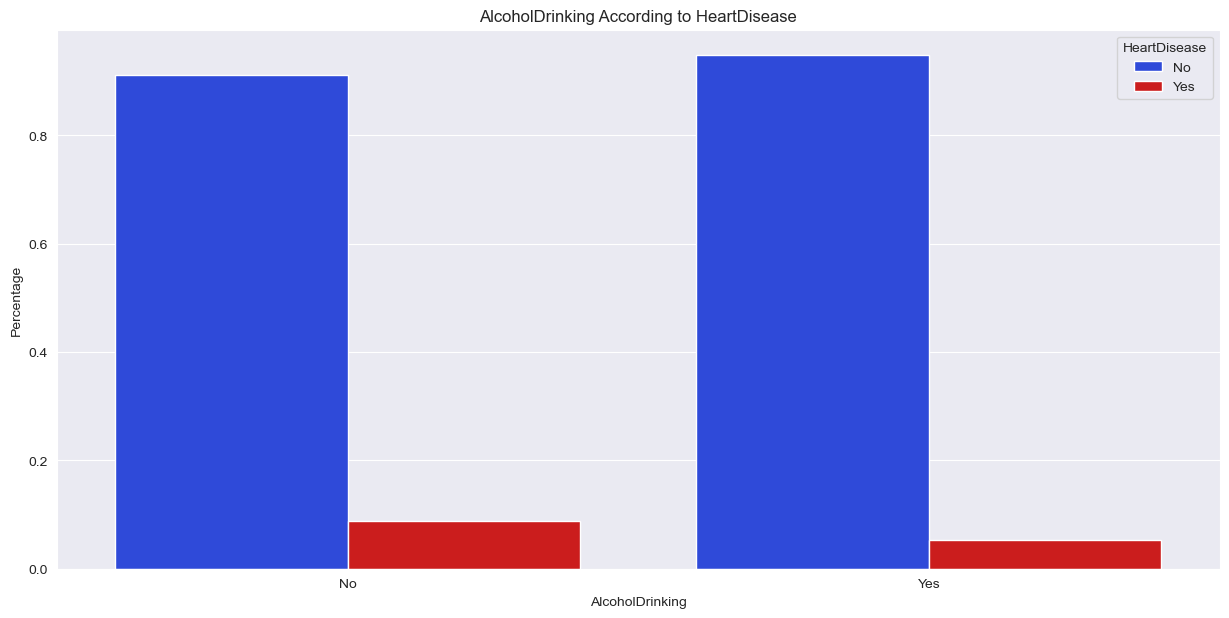

In [241]:
show_relation(CatCols[1], 'HeartDisease', type_='count')

### Relation between Smoking and Heart Disease

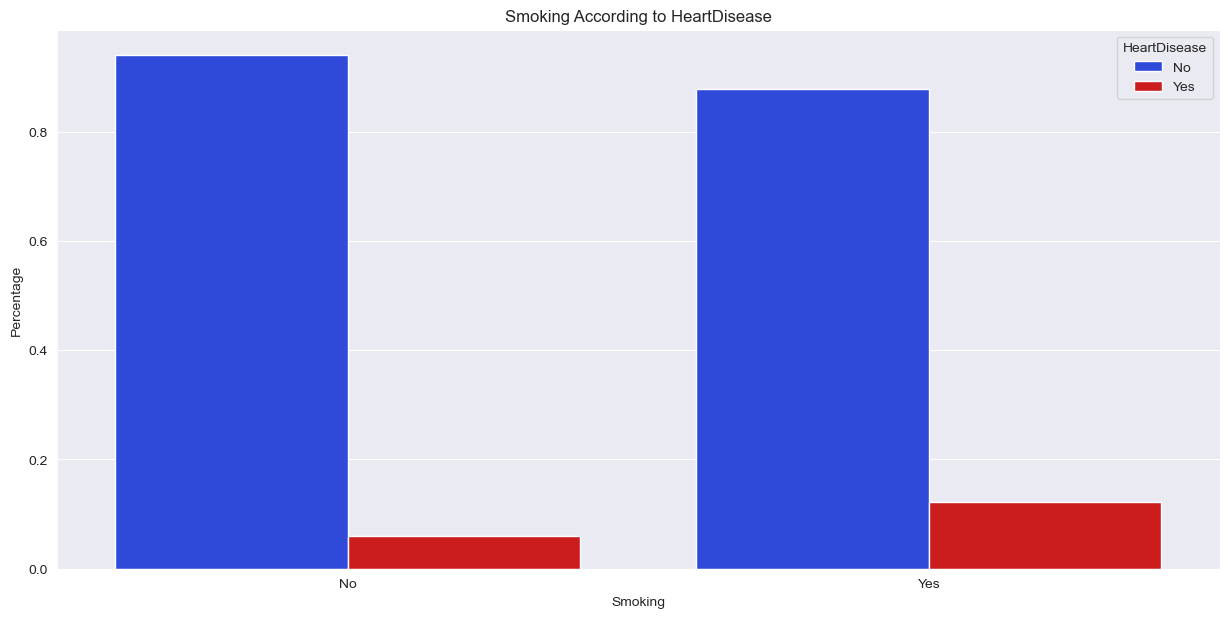

In [242]:
show_relation(CatCols[0], 'HeartDisease', type_='count')

### Relation between Stroke and Heart Disease

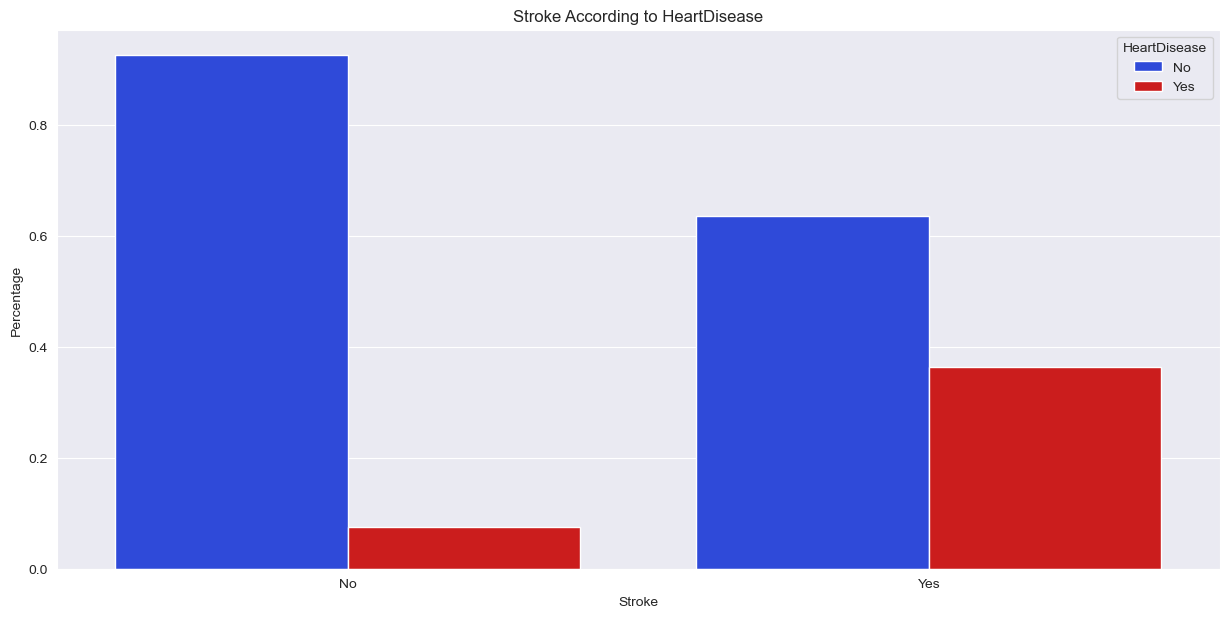

In [243]:
show_relation(CatCols[2], 'HeartDisease', type_='count')

### Relation between Diabetic and Heart Disease

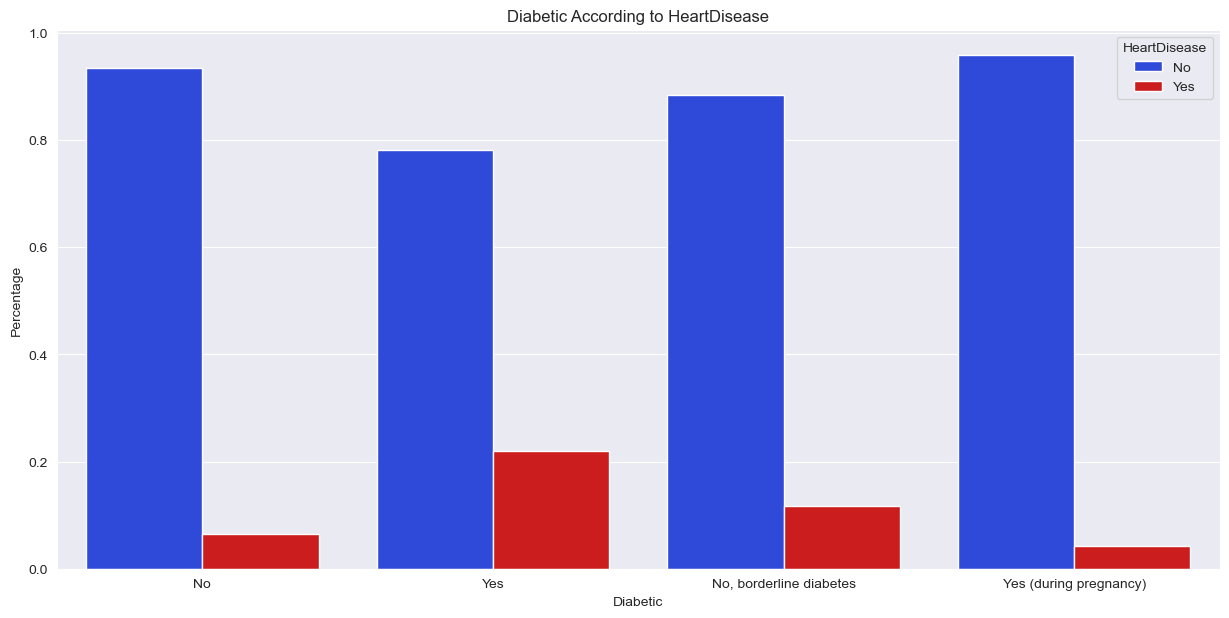

In [244]:
show_relation(CatCols[7], 'HeartDisease', type_='count')

### Relation between Physical Activity and Heart Disease

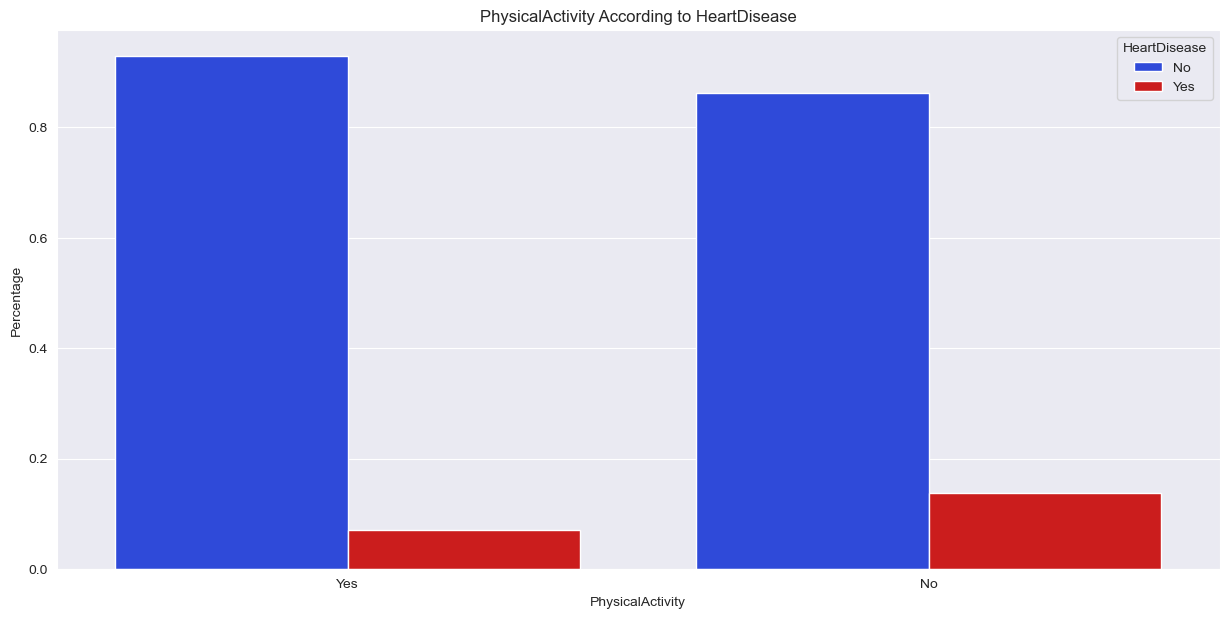

In [245]:
show_relation(CatCols[8], 'HeartDisease', type_='count')

### Relation between DiffWalking and Heart Disease

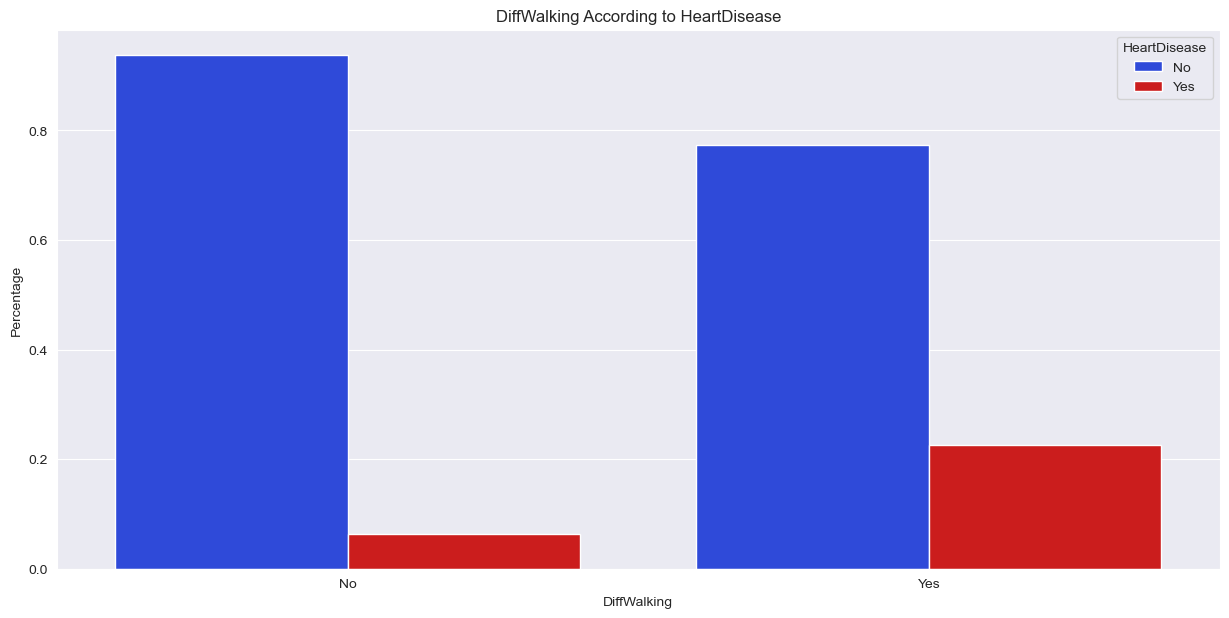

In [246]:
show_relation(CatCols[3], 'HeartDisease', type_='count')

###  Relation between General Health and Heart Disease

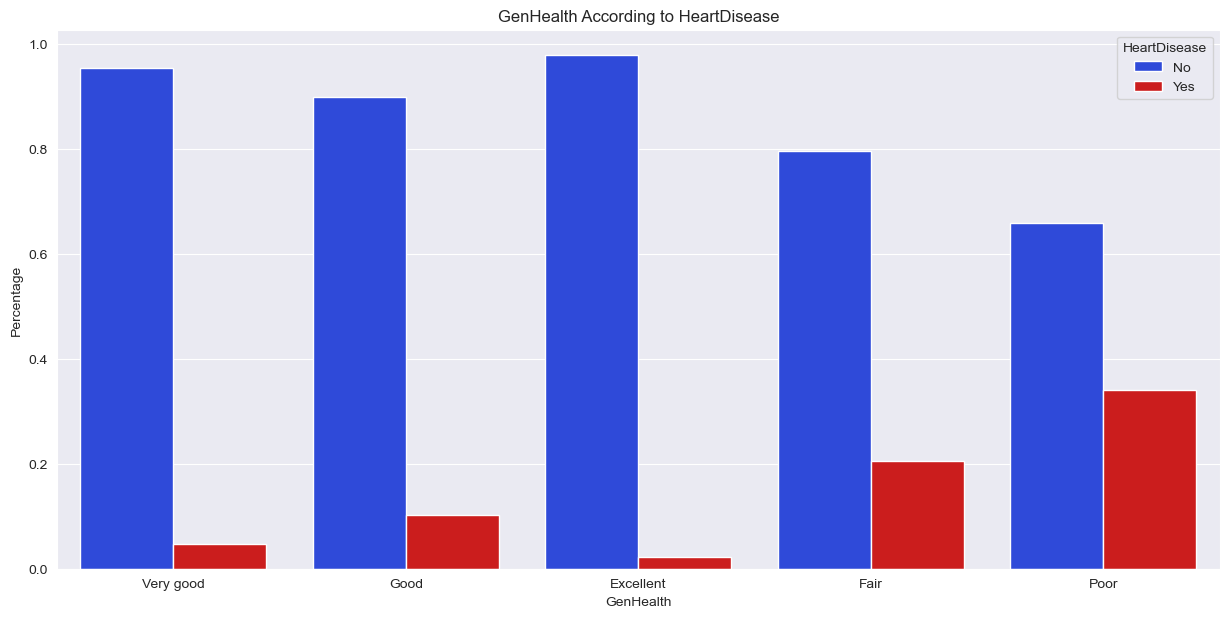

In [247]:
show_relation(CatCols[9], 'HeartDisease', type_='count')

### Relation between Kidney Disease and Heart Disease

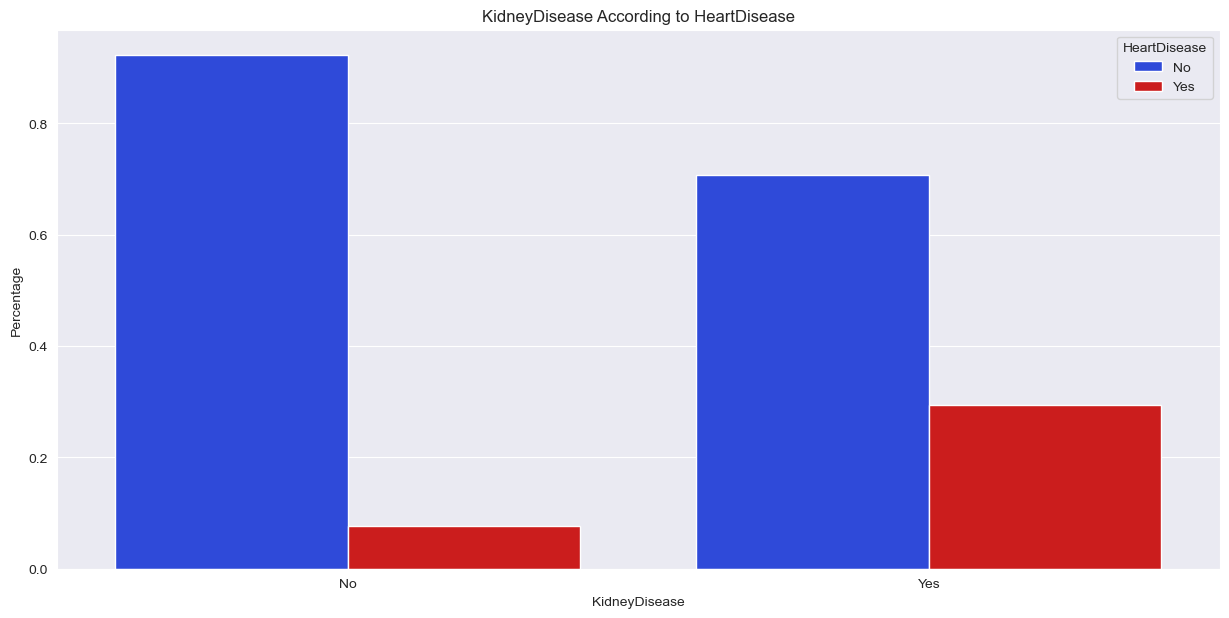

In [248]:
show_relation(CatCols[11], 'HeartDisease', type_='count')

### Relation between Asthma Disease and Heart Disease

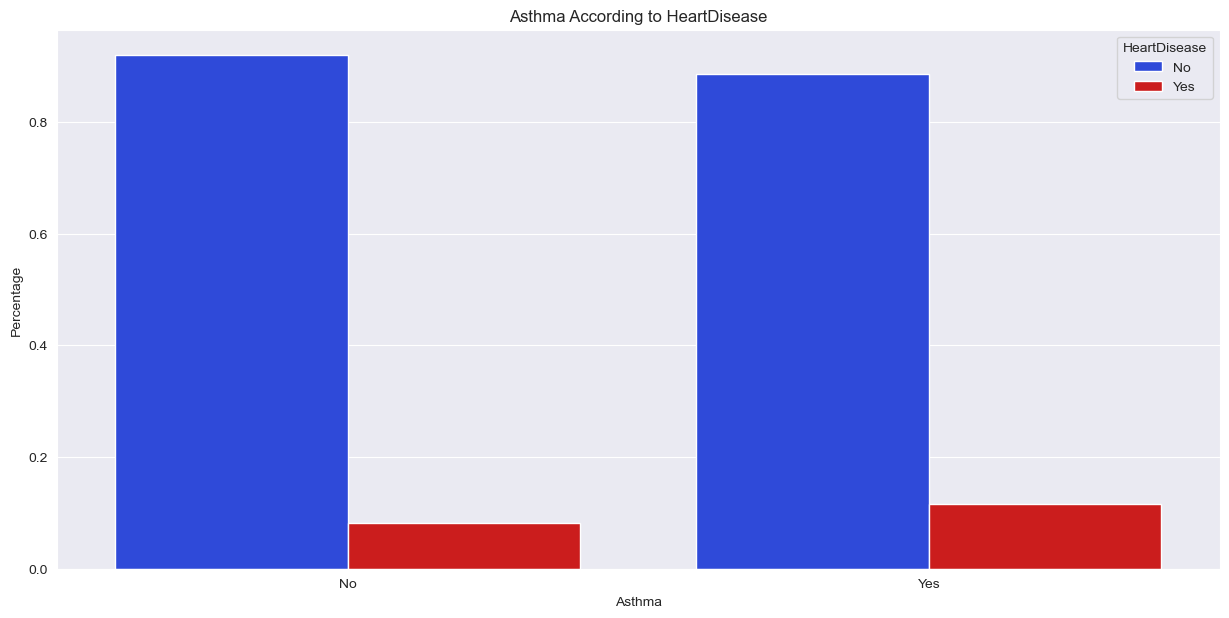

In [249]:
show_relation(CatCols[10], 'HeartDisease', type_='count')

### Relation between SkinCancer and Heart Disease

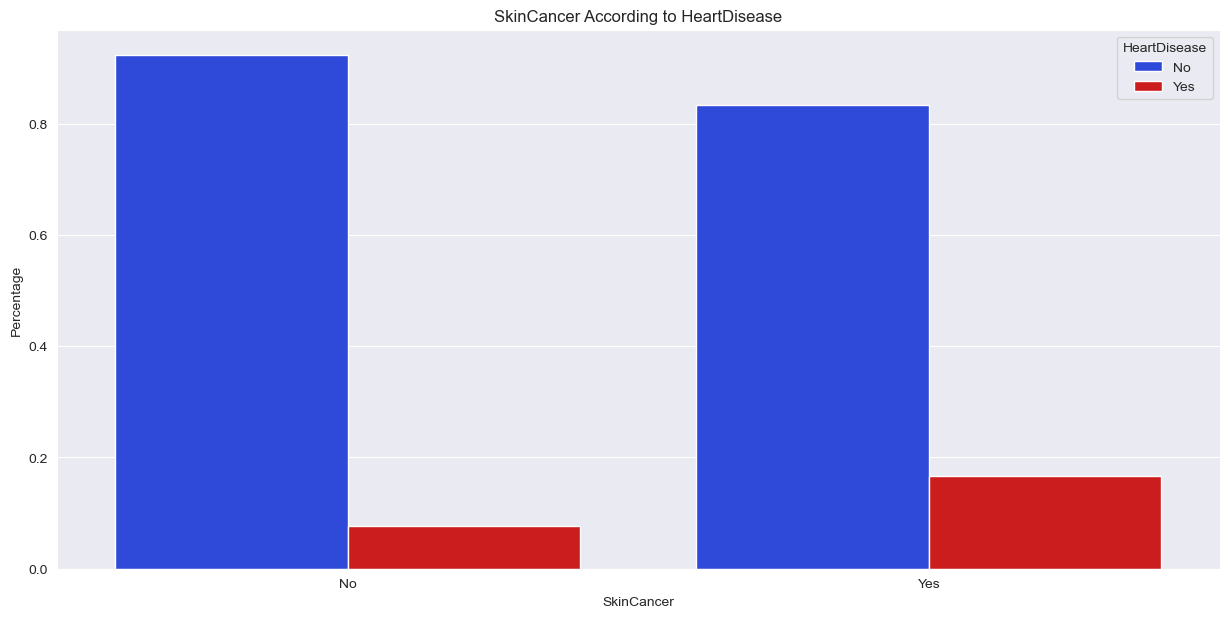

In [250]:
show_relation(CatCols[12], 'HeartDisease', type_='count')

### Relation between PhysicalHealth and Heart Disease

<Figure size 1500x700 with 0 Axes>

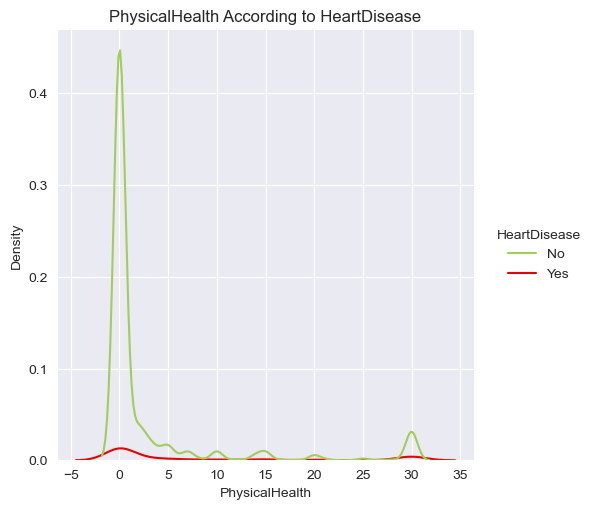

In [251]:
show_relation(NumCols[1], 'HeartDisease')

# Data Transformation

In [252]:
#Encoding Binary Categorical Features
DF['Smoking'] = pd.Series(np.where(DF['Smoking'] == 'Yes', 1, 0))
DF['AlcoholDrinking'] = pd.Series(np.where(DF['AlcoholDrinking'] == 'Yes', 1, 0))
DF['Stroke'] = pd.Series(np.where(DF['Stroke'] == 'Yes', 1, 0))
DF['DiffWalking'] = pd.Series(np.where(DF['DiffWalking'] == 'Yes', 1, 0))
DF['PhysicalActivity'] = pd.Series(np.where(DF['PhysicalActivity'] == 'Yes', 1, 0))
DF['Asthma'] = pd.Series(np.where(DF['Asthma'] == 'Yes', 1, 0))
DF['KidneyDisease'] = pd.Series(np.where(DF['KidneyDisease'] == 'Yes', 1, 0))
DF['SkinCancer'] = pd.Series(np.where(DF['SkinCancer'] == 'Yes', 1, 0))
DF['HeartDisease'] = pd.Series(np.where(DF['HeartDisease'] == 'Yes', 1, 0))

In [253]:
#Encoding Multiple Categorical Features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
DF['Sex']=le.fit_transform(DF['Sex'])
DF['AgeCategory']=le.fit_transform(DF['AgeCategory'])
DF['Race']=le.fit_transform(DF['Race'])
DF['Diabetic']=le.fit_transform(DF['Diabetic'])
DF['GenHealth']=le.fit_transform(DF['GenHealth'])

# Correlation Matrix

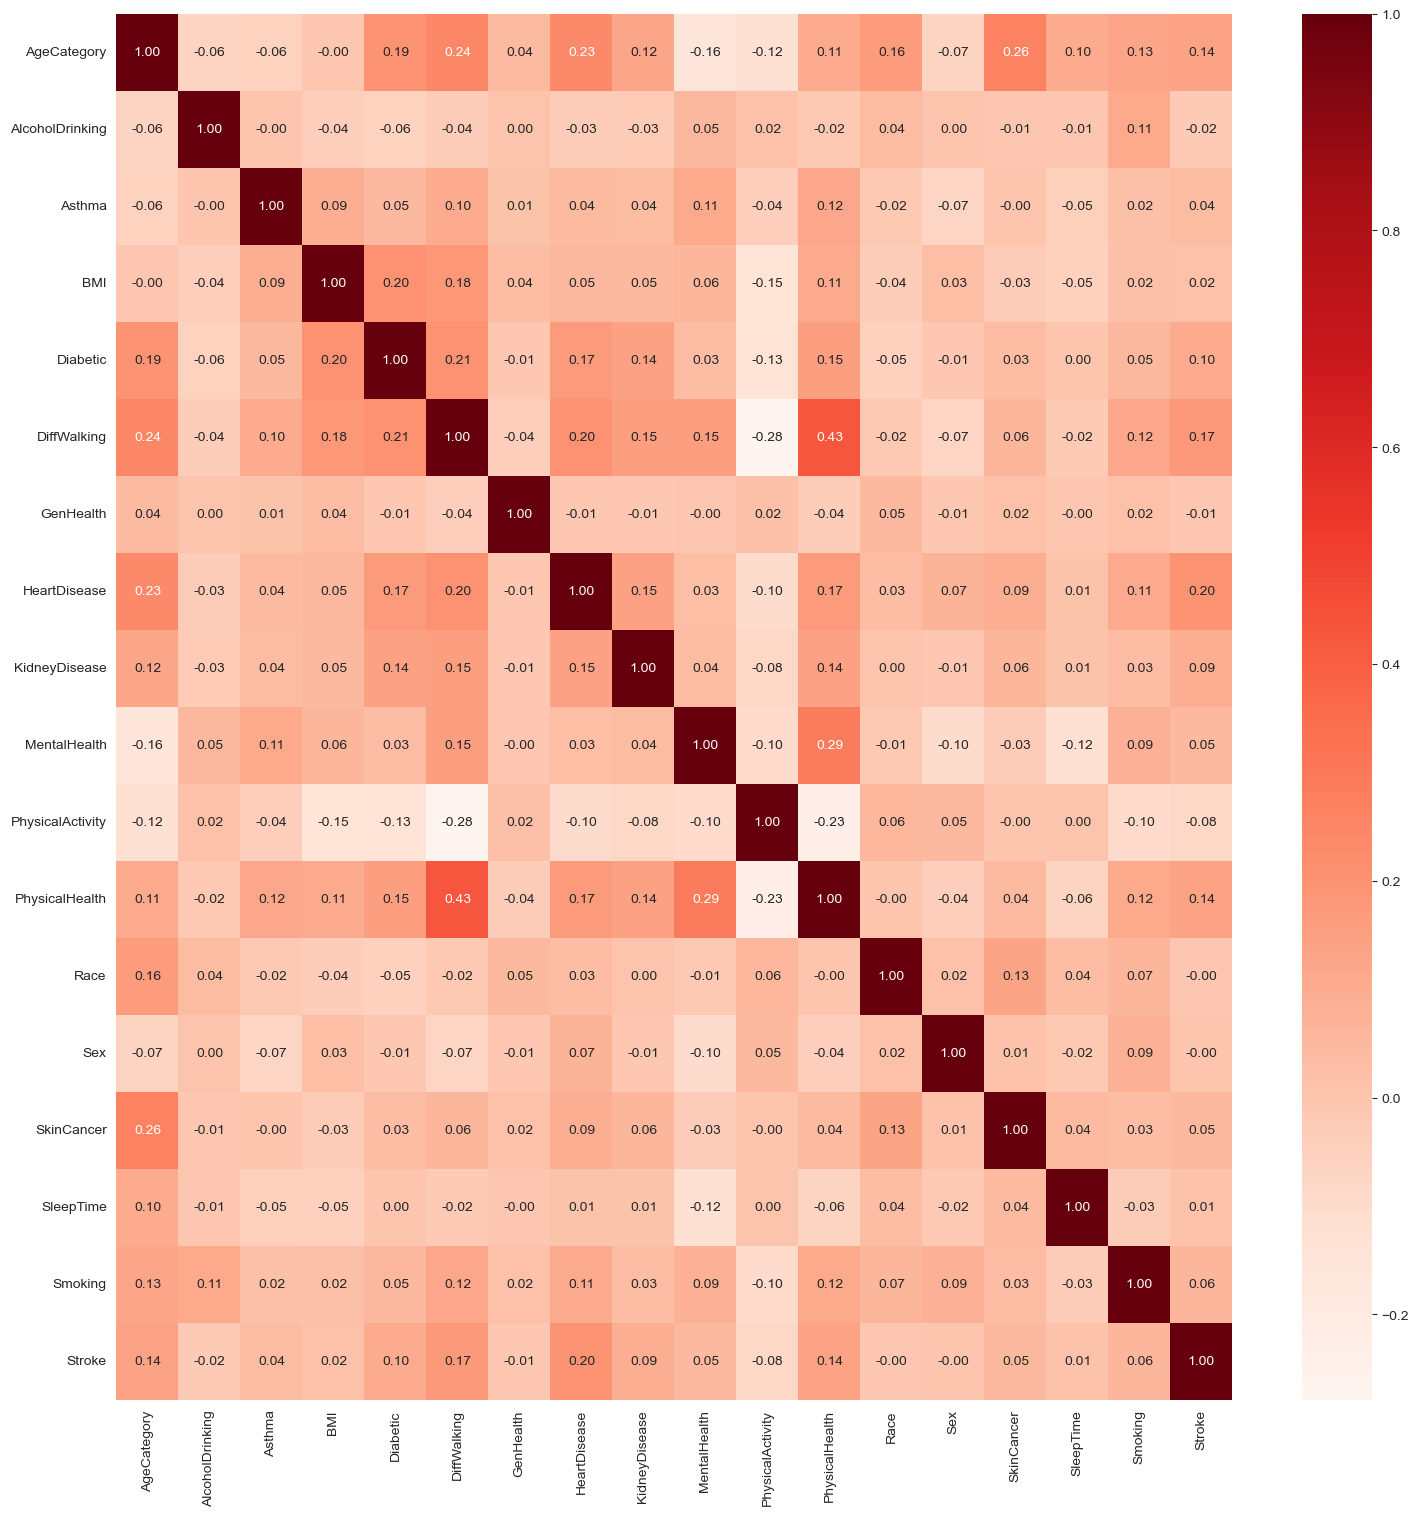

In [254]:
plt.figure(figsize=(18,18))
df = DF[DF.columns.difference(['id'])]
cor = df.corr()
sbn.heatmap(cor, annot=True, cmap=plt.cm.Reds, fmt='.2f')
plt.show()